In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree, metrics
from matplotlib import pyplot as plt
#from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.model_selection import  cross_val_score, cross_validate
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.model_selection import validation_curve
import datetime
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, classification_report



from sklearn.model_selection import learning_curve, validation_curve, train_test_split
#from sklearn.model_selection import GridSearchCV, StratifiedKFold, ShuffleSplit, KFold
#from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, classification_report
#from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn import model_selection



import sklearn.preprocessing as preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


import os
from IPython.display import Image

In [7]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationalnum','marital-status', 'occupation', 'relationship', 'race', 'gender','capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry','income']

train = pd.read_csv('adult.csv', header=None, names = columns)
test = pd.read_csv('adult_test.csv',  header=None, names = columns)

adult = pd.concat([train,test])

len(adult)

48842

In [8]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationalnum',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'income'],
      dtype='object')

In [9]:
adult['nativecountry'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [10]:
print("Before dropping size = " , len(adult))

adult = adult[adult.occupation.str.strip() != '?']
adult = adult[adult.workclass.str.strip() != '?']
adult = adult[adult.nativecountry.str.strip() != '?']

print("After removing rows with value ?" , len(adult))


Before dropping size =  48842
After removing rows with value ? 45222


In [11]:
def func(x):
    if(x == " <=50K" or x == " <=50K."):
        return 0
    elif(x == " >50K" or x == ' >50K.'):
        return 1
adult['income'] = adult['income'].apply(func)

y = adult['income']
del adult['income']

In [12]:
adult.head()

,age,workclass,fnlwgt,education,educationalnum,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


#### Education and educationnum both represent the level of education. So we can remove one of them.
#### fnlwgt – The number of people the census takers believe that observation represents. Remove this variable.

In [13]:
del adult['education']
del adult['fnlwgt']

In [14]:
adult.head()

,age,workclass,educationalnum,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [15]:
adult = pd.get_dummies(adult, columns=['workclass','marital-status','occupation',
                                         'relationship','race',
                                         'gender','nativecountry'])

In [16]:
adult.shape

(45222, 87)

In [17]:

# Train - Test split# Train  
adult_X_train, adult_X_test, adult_y_train, adult_y_test = train_test_split(adult, y, test_size  = 0.3, random_state = 55)

print("Training dataset size: ", len(adult_X_train))
print("Testing dataset size: ", len(adult_X_test))
print("Training label dataset size: ", len(adult_y_train))
print("Testing label dataset size: ", len(adult_y_test))

Training dataset size:  31655
Testing dataset size:  13567
Training label dataset size:  31655
Testing label dataset size:  13567


In [18]:
#min_max_scaler = preprocessing.MinMaxScaler()
#adult_X_train = min_max_scaler.fit_transform(adult_X_train)

In [19]:
#adult_X_test = min_max_scaler.fit_transform(adult_X_test)
#min_max_scaler = preprocessing.MinMaxScaler()
#X_train = min_max_scaler.fit_transform(X_train)
adult_X_train = preprocessing.scale(adult_X_train)
adult_X_test = preprocessing.scale(adult_X_test)

### Load bank dataset

In [20]:
bank_data = pd.read_csv('bank-full.csv', delimiter = ";", header="infer")
print(len(bank_data))

bank_data = pd.get_dummies(bank_data, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'])

bank_data.y.replace(('yes','no'), (1,0), inplace = True)

y = bank_data['y']
del bank_data['y']



45211


In [21]:
# Train - Test split# Train  
bank_X_train, bank_X_test, bank_y_train, bank_y_test = train_test_split(bank_data, y, test_size  = 0.3, random_state = 55)

print("Bank Training dataset size: ", len(bank_X_train))
print("Bank Testing dataset size: ", len(bank_X_test))
print("Bank Training label dataset size: ", len(bank_y_train))
print("Bank Testing label dataset size: ", len(bank_y_test))

Bank Training dataset size:  31647
Bank Testing dataset size:  13564
Bank Training label dataset size:  31647
Bank Testing label dataset size:  13564


In [22]:
bank_X_train = preprocessing.scale(bank_X_train)
bank_X_test = preprocessing.scale(bank_X_test)

## Define helper methods

In [32]:
def get_scores(X_train, Y_train, clf):
    training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    i=0
    train_times=np.zeros(10)
    train_scores=np.zeros(10)
    test_scores=np.zeros(10)
    pred_times=np.zeros(10)
    train_sizes = np.zeros(10)
    
    for sub in training_sizes:
        msk = np.random.rand(len(X_train)) < sub
        smaller_X_train = X_train[msk]
        smaller_y_train = Y_train[msk]
        train_sizes[i] = len(smaller_X_train)
        #print("i = " , i)
        #sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(smaller_X_train, smaller_y_train, test_size=0.3)
        
        scores = cross_validate(clf, smaller_X_train, smaller_y_train, cv = 5, scoring = make_scorer(accuracy_score), return_train_score = True)
        
        train_times[i] = np.mean(scores['fit_time'])
        pred_times[i] = np.mean(scores['score_time'])
        train_scores[i] = np.mean(scores['train_score'])
        test_scores[i] = np.mean(scores['test_score'])
        
        
        i = i + 1
        
    return train_times, pred_times, train_scores, test_scores, train_sizes
        

In [9]:
def plot_curve(train_sizes, arr1, arr2, arr3, arr4, arr5, title, xlabel, ylabel):
    lw = 2
    labels=["Decision Tree", "kNN", "Neural Network","Support Vector", "Boosting" ]
    plt.plot(train_sizes, arr1, 'o-', color="b",label=labels[0],  lw=lw)
    plt.plot(train_sizes, arr2, 'o-', color="g",label=labels[1],  lw=lw)
    plt.plot(train_sizes, arr3, 'o-', color="r",label=labels[2],  lw=lw)
    plt.plot(train_sizes, arr4, 'o-', color="m",label=labels[3],  lw=lw)
    plt.plot(train_sizes, arr5, 'o-', color="k",label=labels[4],  lw=lw)
    
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.show()  
    


In [27]:
#Create timings for Cross validation Set on Adult Income dataset
income_dt_clf = tree.DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 41)
income_dt_train_times, income_dt_pred_times, income_dt_train_scores, income_dt_test_scores, train_sizes = get_scores(adult_X_train, adult_y_train,income_dt_clf )    

#Create timings for Cross validation Set on Adult Income dataset
income_boost_clf = GradientBoostingClassifier(n_estimators = 400, min_samples_split = 50 )
income_boost_train_times, income_boost_pred_times, income_boost_train_scores, income_boost_test_scores, train_sizes = get_scores(adult_X_train, adult_y_train,income_boost_clf )    






In [28]:
#Create timings Adult Income dataset using SVM
income_svm_clf = SVC(kernel = "linear", C = 1)
income_svm_train_times, income_svm_pred_times, income_svm_train_scores, income_svm_test_scores, train_sizes = get_scores(adult_X_train, adult_y_train, income_svm_clf )    


In [29]:
#Create timings Adult Income dataset using MLP
income_mlp_clf = MLPClassifier(hidden_layer_sizes = (20,), activation = "relu", solver = "adam", learning_rate_init=0.001)
income_mlp_train_times, income_mlp_pred_times, income_mlp_train_scores, income_mlp_test_scores, train_sizes = get_scores(adult_X_train, adult_y_train,income_mlp_clf )    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

In [30]:
##Create timings Adult Income dataset using kNN
income_knn_clf = KNeighborsClassifier(n_neighbors=14, metric = "manhattan")
income_knn_train_times, income_knn_pred_times, income_knn_train_scores, income_knn_test_scores, train_sizes = get_scores(adult_X_train, adult_y_train,income_knn_clf )    


In [33]:
#Create timings for Cross validation Set on Bank dataset
bank_dt_clf = tree.DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 200)
bank_dt_train_times, bank_dt_pred_times, bank_dt_train_scores, bank_dt_test_scores, bank_train_sizes = get_scores(bank_X_train, bank_y_train,bank_dt_clf )    

#Create timings for Cross validation Set on Bank dataset
bank_boost_clf = GradientBoostingClassifier(n_estimators = 450, min_samples_split = 60 )
bank_boost_train_times, bank_boost_pred_times, bank_boost_train_scores, bank_boost_test_scores, bank_train_sizes = get_scores(bank_X_train, bank_y_train,bank_boost_clf)    



In [34]:
#Create timings for Cross validation Set on Bank dataset
bank_svm_clf = SVC(kernel = "rbf", C = 1)
bank_svm_train_times, bank_svm_pred_times, bank_svm_train_scores, bank_svm_test_scores, bank_train_sizes = get_scores(bank_X_train, bank_y_train, bank_svm_clf )    

bank_mlp_clf = MLPClassifier(hidden_layer_sizes = (10,), activation = "tanh", solver = "sgd", learning_rate_init=0.001)
bank_mlp_train_times, bank_mlp_pred_times, bank_mlp_train_scores, bank_mlp_test_scores, bank_train_sizes = get_scores(bank_X_train, bank_y_train, bank_mlp_clf )    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [35]:
##Create timings Bank dataset using kNN
bank_knn_clf = KNeighborsClassifier(n_neighbors=125, metric = 'minkowski')
bank_knn_train_times, bank_knn_pred_times, bank_knn_train_scores, bank_knn_test_scores, bank_train_sizes = get_scores(bank_X_train, bank_y_train, bank_knn_clf )    


In [39]:
print("Marketing values")
print("bank knn")
print("*****")
print("train times")
print(bank_knn_train_times)
print("pred times")
print(bank_knn_pred_times)
print("train scores")
print(bank_knn_train_scores)
print("test scores")
print(bank_knn_test_scores)
print("train sizes")
print(bank_train_sizes)
print("Marketing values")
print("****bank mlp****")
print("*****")
print("train times")
print(bank_mlp_train_times)
print("pred times")
print(bank_mlp_pred_times)
print("train scores")
print(bank_mlp_train_scores)
print("test scores")
print(bank_mlp_test_scores)
print("train sizes")
print(bank_train_sizes)
print("Marketing values")
print("****bank svm****")
print("*****")
print("train times")
print(bank_svm_train_times)
print("pred times")
print(bank_svm_pred_times)
print("train scores")
print(bank_svm_train_scores)
print("test scores")
print(bank_svm_test_scores)
print("train sizes")
print(bank_train_sizes)
print("Marketing values")
print("****bank boost****")
print("*****")
print("train times")
print(bank_boost_train_times)
print("pred times")
print(bank_boost_pred_times)
print("train scores")
print(bank_boost_train_scores)
print("test scores")
print(bank_boost_test_scores)
print("train sizes")
print(bank_train_sizes)
print("Marketing values")
print("****bank dt****")
print("*****")
print("train times")
print(bank_dt_train_times)
print("pred times")
print(bank_dt_pred_times)
print("train scores")
print(bank_dt_train_scores)
print("test scores")
print(bank_dt_test_scores)
print("train sizes")
print(bank_train_sizes)

Marketing values
bank knn
*****
train times
[0.00739546 0.01679029 0.05236993 0.08315721 0.13192668 0.17610126
 0.1675087  0.35280437 0.43315811 0.51950598]
pred times
[ 0.14731526  0.5219008   1.05199347  2.33744688  4.03487096  6.64296527
 11.40721664 14.09526353 17.80612149 22.33732109]
train scores
[0.88541996 0.88425778 0.88714437 0.89011514 0.89105261 0.88699188
 0.89079121 0.89237606 0.89103738 0.89182229]
test scores
[0.88542062 0.88437871 0.88682794 0.88932128 0.89058037 0.8868998
 0.88973916 0.89192189 0.88971791 0.89022661]
train sizes
[ 3203.  6184.  9490. 12595. 15893. 18992. 22093. 25315. 28418. 31647.]
Marketing values
****bank mlp****
*****
train times
[0.66201515 1.48134556 1.79716382 2.1073854  2.86574788 3.07082973
 3.40843534 3.42262712 4.54417925 4.53978314]
pred times
[0.00059981 0.00039988 0.00059991 0.00079966 0.00159907 0.00139961
 0.00159922 0.00139966 0.0017993  0.0015996 ]
train scores
[0.89956564 0.91008001 0.90889187 0.90278759 0.90375148 0.90660949
 0.906

In [42]:
print("Income values")
print("income knn")
print("*****")
print("train times")
print(income_knn_train_times)
print("pred times")
print(income_knn_pred_times)
print("train scores")
print(income_knn_train_scores)
print("test scores")
print(income_knn_test_scores)
print("train sizes")
print(train_sizes)
print("Income values")
print("****income mlp****")
print("*****")
print("train times")
print(income_mlp_train_times)
print("pred times")
print(income_mlp_pred_times)
print("train scores")
print(income_mlp_train_scores)
print("test scores")
print(income_mlp_test_scores)
print("train sizes")
print(train_sizes)
print("Income values")
print("****income svm****")
print("*****")
print("train times")
print(income_svm_train_times)
print("pred times")
print(income_svm_pred_times)
print("train scores")
print(income_svm_train_scores)
print("test scores")
print(income_svm_test_scores)
print("train sizes")
print(train_sizes)
print("Income values")
print("****income boost****")
print("*****")
print("train times")
print(income_boost_train_times)
print("pred times")
print(income_boost_pred_times)
print("train scores")
print(income_boost_train_scores)
print("test scores")
print(income_boost_test_scores)
print("train sizes")
print(train_sizes)
print("Income values")
print("****income dt****")
print("*****")
print("train times")
print(income_dt_train_times)
print("pred times")
print(income_dt_pred_times)
print("train scores")
print(income_dt_train_scores)
print("test scores")
print(income_dt_test_scores)
print("train sizes")
print(train_sizes)

Income values
income knn
*****
train times
[0.01339192 0.04477668 0.10493627 0.172506   0.27264795 0.39597692
 0.54288983 0.69280849 0.87849092 1.08318305]
pred times
[ 0.16130662  0.63223052  1.60688152  2.5667201   3.9077445   5.46165414
  8.29761367 10.33464217 12.71567235 15.27559676]
train scores
[0.83908866 0.8384426  0.84673156 0.84744409 0.84780058 0.84971374
 0.84812452 0.84845017 0.85059442 0.84979465]
test scores
[0.81596754 0.82030223 0.82979395 0.8298722  0.82892388 0.83148677
 0.8255715  0.82790843 0.83039656 0.83054798]
train sizes
[ 3157.  6394.  9653. 12520. 15800. 19037. 22181. 25132. 28431. 31655.]
Income values
****income mlp****
*****
train times
[ 1.18151879  2.22191935  3.43521976  4.53438625  5.53740811  6.7545063
  7.45989947  8.56446266  9.72779207 11.18894954]
pred times
[0.00099964 0.00099959 0.00119944 0.00159945 0.00179906 0.00239878
 0.00259876 0.0029985  0.0029985  0.00319834]
train scores
[0.89773846 0.88802782 0.88202776 0.87375747 0.87179532 0.8693184

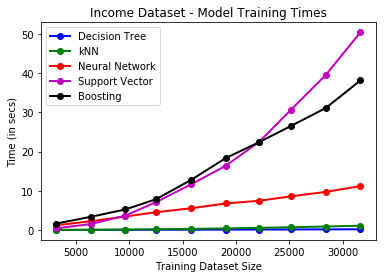

In [11]:
'''
income_dt_train_times=np.zeros(10)
income_knn_train_times=np.zeros(10)
income_mlp_train_times=np.zeros(10)
income_svm_train_times=np.zeros(10)
income_boost_train_sizes = np.zeros(10)
train_size = np
'''
income_dt_train_times = np.array([0.0099946,0.01979089,0.03158178,0.04457173,0.05956287,0.08495321,0.10634136,0.12112813,0.14811206,0.17630081])
income_knn_train_times = np.array([0.01339192, 0.04477668, 0.10493627, 0.172506,   0.27264795, 0.39597692,0.54288983, 0.69280849, 0.87849092, 1.08318305])
income_mlp_train_times = np.array([1.18151879,  2.22191935,  3.43521976,  4.53438625,  5.53740811,  6.7545063,7.45989947,  8.56446266,  9.72779207, 11.18894954])
income_svm_train_times = np.array([0.42075453,  1.50032949,  3.6706811,   7.09770484, 11.63568707, 16.35956869,22.49682846, 30.62594423, 39.61317496, 50.46690726])
income_boost_train_times = np.array([1.61986356, 3.34467711,  5.23858085,  7.84868093, 12.76641469, 18.3337532,22.42476349, 26.51914587, 31.15444441, 38.17342839])
train_sizes = np.array([3157.,  6394.,  9653., 12520., 15800., 19037., 22181., 25132., 28431., 31655.])




plot_curve(train_sizes, income_dt_train_times, income_knn_train_times, income_mlp_train_times, income_svm_train_times, income_boost_train_times, "Income Dataset - Model Training Times", "Training Dataset Size", "Time (in secs)")

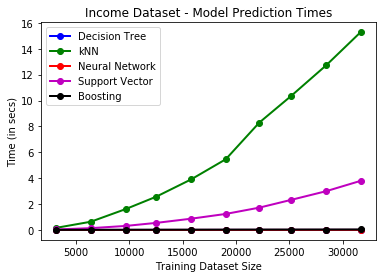

In [13]:

income_dt_pred_times = np.array([0.00099916, 0.00079961, 0.0011992,  0.00159698, 0.0015995,  0.00219989,0.00239878, 0.00259824, 0.00279846, 0.00299859])
income_knn_pred_times = np.array([ 0.16130662,  0.63223052,  1.60688152,  2.5667201,3.9077445, 5.46165414,8.29761367, 10.33464217, 12.71567235, 15.27559676])
income_mlp_pred_times = np.array([0.00099964, 0.00099959, 0.00119944, 0.00159945, 0.00179906, 0.00239878,0.00259876, 0.0029985,  0.0029985,  0.00319834])
income_svm_pred_times = np.array([0.03578486, 0.13652439, 0.30802526, 0.54329743, 0.86830482, 1.23548551,1.72280779, 2.31707101, 2.99227672, 3.78962426])
income_boost_pred_times = np.array([0.00379729, 0.00719585, 0.01059585, 0.0135922,  0.01759181, 0.02118931,0.02518277, 0.02778945, 0.03098764,0.03478274])
train_sizes = np.array([3157.,  6394.,  9653., 12520., 15800., 19037., 22181., 25132., 28431., 31655.])




plot_curve(train_sizes, income_dt_pred_times, income_knn_pred_times, income_mlp_pred_times, income_svm_pred_times, income_boost_pred_times, "Income Dataset - Model Prediction Times", "Training Dataset Size", "Time (in secs)")

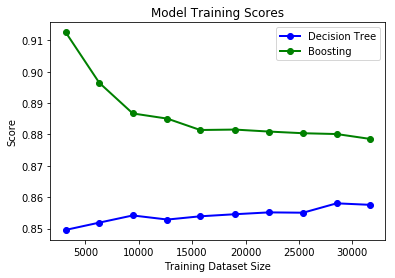

In [39]:
plot_curve(train_sizes, income_dt_train_scores, income_boost_train_scores, "Income Dataset - Model Training Scores", "Training Dataset Size", "Score")

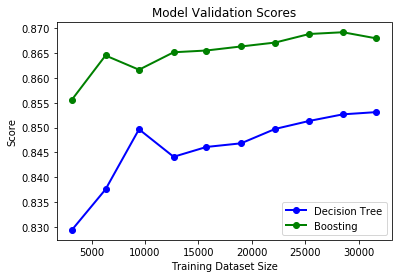

In [40]:
plot_curve(train_sizes, income_dt_test_scores, income_boost_test_scores, "Income Dataset - Model Validation Scores", "Training Dataset Size", "Score")

### Create Learning Curve for kNN - Sample dataset size vs. Time

In [ ]:


np.random.seed(55)
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


#Create timings for Cross validation Set on Adult Income dataset
adult_knn = KNeighborsClassifier(n_neighbors=20)
train_sizes = np.zeros(10)

i=0
adult_times_cv=np.zeros(10)
    
for sub in training_sizes:
    msk = np.random.rand(len(adult_X_train)) < sub
    smaller_X_train = adult_X_train[msk]
    smaller_y_train = adult_y_train[msk]
    train_sizes[i] = len(smaller_X_train)
    #print("i = " , i)
    sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(smaller_X_train, smaller_y_train, 
                                                                            test_size=0.3)
    t_start = datetime.datetime.now()
    scores = cross_val_score(adult_knn , sub_X_train, sub_y_train, cv = 5, scoring = make_scorer(accuracy_score))
    t_end = datetime.datetime.now()
    duration = t_end - t_start
    
    #convert seconds to microseconds 
    #print("duration = ", duration)
    adult_times_cv[i] = (duration.microseconds / 1000) + (duration.seconds * 1000)
    i = i + 1

print(adult_times_cv)


#Create timings for Cross validation Set on Bank dataset
bank_knn = KNeighborsClassifier(n_neighbors=35)

i=0
bank_times_cv=np.zeros(10)

for sub in training_sizes:
    msk = np.random.rand(len(bank_X_train)) < sub
    smaller_X_train = bank_X_train[msk]
    smaller_y_train = bank_y_train[msk]
    sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(smaller_X_train, smaller_y_train, 
                                                                            test_size=0.3)
    t_start = datetime.datetime.now()
    scores = cross_val_score(bank_knn, sub_X_train, sub_y_train, cv = 5, scoring = make_scorer(accuracy_score))
    t_end = datetime.datetime.now()
    duration = t_end - t_start
    
    #convert seconds to microseconds 
    #print("duration = ", duration)
    bank_times_cv[i] = (duration.microseconds / 1000) + (duration.seconds * 1000)
    i = i + 1

print(bank_times_cv)
print(train_sizes)

lw = 2
plt.plot(train_sizes, bank_times_cv, 'o-', color="b",
             label="Bank Dataset Learning Rate",  lw=lw)
plt.plot(train_sizes, adult_times_cv, 'o-', color="g",
             label="Adult Dataset Learning Rate",  lw=lw)


plt.title("Bank vs Adult Dataset - kNN Learning Rate \n (Figure 15)")
plt.xlabel('Training Dataset Size')
plt.ylabel('Time (in milliseconds)')
plt.legend(loc="best")
plt.show()     







### Create Learning Curve for SVM - Sample dataset size vs. Time

In [32]:
print(train_sizes)

NameError: name 'train_sizes' is not defined

In [ ]:


np.random.seed(55)
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


#Create timings for Cross validation Set on Adult Income dataset
adult_svm = SVC(kernel = "rbf", C = 200)
train_sizes = np.zeros(10)

i=0
adult_times_cv=np.zeros(10)
    
for sub in training_sizes:
    msk = np.random.rand(len(adult_X_train)) < sub
    smaller_X_train = adult_X_train[msk]
    smaller_y_train = adult_y_train[msk]
    train_sizes[i] = len(smaller_X_train)
    #print("i = " , i)
    sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(smaller_X_train, smaller_y_train, 
                                                                            test_size=0.3)
    t_start = datetime.datetime.now()
    scores = cross_val_score(adult_svm , sub_X_train, sub_y_train, cv = 5, scoring = make_scorer(accuracy_score))
    t_end = datetime.datetime.now()
    duration = t_end - t_start
    
    #convert seconds to microseconds 
    #print("duration = ", duration)
    adult_times_cv[i] = (duration.microseconds / 1000) + (duration.seconds * 1000)
    i = i + 1

print(adult_times_cv)


#Create timings for Cross validation Set on Bank dataset
bank_svm = SVC(kernel = "rbf", C = 100)

i=0
bank_times_cv=np.zeros(10)

for sub in training_sizes:
    msk = np.random.rand(len(bank_X_train)) < sub
    smaller_X_train = bank_X_train[msk]
    smaller_y_train = bank_y_train[msk]
    sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(smaller_X_train, smaller_y_train, 
                                                                            test_size=0.3)
    t_start = datetime.datetime.now()
    scores = cross_val_score(bank_svm, sub_X_train, sub_y_train, cv = 5, scoring = make_scorer(accuracy_score))
    t_end = datetime.datetime.now()
    duration = t_end - t_start
    
    #convert seconds to microseconds 
    #print("duration = ", duration)
    bank_times_cv[i] = (duration.microseconds / 1000) + (duration.seconds * 1000)
    i = i + 1

print(bank_times_cv)
print(train_sizes)

lw = 2
plt.plot(train_sizes, bank_times_cv, 'o-', color="b",
             label="Bank Dataset Learning Rate",  lw=lw)
plt.plot(train_sizes, adult_times_cv, 'o-', color="g",
             label="Adult Dataset Learning Rate",  lw=lw)


plt.title("Bank vs Adult Dataset - SVM Learning Rate \n (Figure 20)")
plt.xlabel('Training Dataset Size')
plt.ylabel('Time (in milliseconds)')
plt.legend(loc="best")
plt.show()     







In [ ]:
np.random.seed(55)
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


#Create timings for Cross validation Set on Adult Income dataset
adult_boost = XGBClassifier(max_depth = 6, n_estimators=150)
train_sizes = np.zeros(10)

i=0
adult_times_cv=np.zeros(10)
    
for sub in training_sizes:
    msk = np.random.rand(len(adult_X_train)) < sub
    smaller_X_train = adult_X_train[msk]
    smaller_y_train = adult_y_train[msk]
    train_sizes[i] = len(smaller_X_train)
    #print("i = " , i)
    sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(smaller_X_train, smaller_y_train, 
                                                                            test_size=0.3)
    t_start = datetime.datetime.now()
    scores = cross_val_score(adult_boost , sub_X_train, sub_y_train, cv = 5, scoring = make_scorer(accuracy_score))
    t_end = datetime.datetime.now()
    duration = t_end - t_start
    
    #convert seconds to microseconds 
    #print("duration = ", duration)
    adult_times_cv[i] = (duration.microseconds / 1000) + (duration.seconds * 1000)
    i = i + 1

print(adult_times_cv)


#Create timings for Cross validation Set on Bank dataset
bank_boost = XGBClassifier(max_depth = 6, n_estimators=200)

i=0
bank_times_cv=np.zeros(10)

for sub in training_sizes:
    msk = np.random.rand(len(bank_X_train)) < sub
    smaller_X_train = bank_X_train[msk]
    smaller_y_train = bank_y_train[msk]
    sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(smaller_X_train, smaller_y_train, 
                                                                            test_size=0.3)
    t_start = datetime.datetime.now()
    scores = cross_val_score(bank_boost, sub_X_train, sub_y_train, cv = 5, scoring = make_scorer(accuracy_score))
    t_end = datetime.datetime.now()
    duration = t_end - t_start
    
    #convert seconds to microseconds 
    #print("duration = ", duration)
    bank_times_cv[i] = (duration.microseconds / 1000) + (duration.seconds * 1000)
    i = i + 1

print(bank_times_cv)
print(train_sizes)

lw = 2
plt.plot(train_sizes, bank_times_cv, 'o-', color="b",
             label="Bank Dataset Learning Rate",  lw=lw)
plt.plot(train_sizes, adult_times_cv, 'o-', color="g",
             label="Adult Dataset Learning Rate",  lw=lw)


plt.title("Bank vs Adult Dataset - Boosting Model Learning Rate \n (Figure 27)")
plt.xlabel('Training Dataset Size')
plt.ylabel('Time (in milliseconds)')
plt.legend(loc="best")
plt.show()  

In [ ]:
np.random.seed(55)
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


#Create timings for Cross validation Set on Adult Income dataset
adult_mlp = MLPClassifier(hidden_layer_sizes = (100,100,100,100), activation = "tanh", solver = "lbfgs")
train_sizes = np.zeros(10)

i=0
adult_times_cv=np.zeros(10)
    
for sub in training_sizes:
    msk = np.random.rand(len(adult_X_train)) < sub
    smaller_X_train = adult_X_train[msk]
    smaller_y_train = adult_y_train[msk]
    train_sizes[i] = len(smaller_X_train)
    #print("i = " , i)
    sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(smaller_X_train, smaller_y_train, 
                                                                            test_size=0.3)
    t_start = datetime.datetime.now()
    scores = cross_val_score(adult_mlp , sub_X_train, sub_y_train, cv = 5, scoring = make_scorer(accuracy_score))
    t_end = datetime.datetime.now()
    duration = t_end - t_start
    
    #convert seconds to microseconds 
    #print("duration = ", duration)
    adult_times_cv[i] = (duration.microseconds / 1000) + (duration.seconds * 1000)
    i = i + 1

print(adult_times_cv)


#Create timings for Cross validation Set on Bank dataset
bank_mlp = MLPClassifier(hidden_layer_sizes = (100,), activation = "tanh", solver = "adam")

i=0
bank_times_cv=np.zeros(10)

for sub in training_sizes:
    msk = np.random.rand(len(bank_X_train)) < sub
    smaller_X_train = bank_X_train[msk]
    smaller_y_train = bank_y_train[msk]
    sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(smaller_X_train, smaller_y_train, 
                                                                            test_size=0.3)
    t_start = datetime.datetime.now()
    scores = cross_val_score(bank_mlp, sub_X_train, sub_y_train, cv = 5, scoring = make_scorer(accuracy_score))
    t_end = datetime.datetime.now()
    duration = t_end - t_start
    
    #convert seconds to microseconds 
    #print("duration = ", duration)
    bank_times_cv[i] = (duration.microseconds / 1000) + (duration.seconds * 1000)
    i = i + 1

print(bank_times_cv)
print(train_sizes)

lw = 2
plt.plot(train_sizes, bank_times_cv, 'o-', color="b",
             label="Bank Dataset Learning Rate",  lw=lw)
plt.plot(train_sizes, adult_times_cv, 'o-', color="g",
             label="Adult Dataset Learning Rate",  lw=lw)


plt.title("Bank vs Adult Dataset - MLP Learning Rate \n (Figure 36)")
plt.xlabel('Training Dataset Size')
plt.ylabel('Time (in milliseconds)')
plt.legend(loc="best")
plt.show()  

In [ ]:
lw = 2
plt.plot(train_sizes, bank_times_cv/1000, 'o-', color="b",
             label="Bank Dataset Learning Rate",  lw=lw)
plt.plot(train_sizes, adult_times_cv/1000, 'o-', color="g",
             label="Adult Dataset Learning Rate",  lw=lw)


plt.title("Bank vs Adult Dataset - MLP Learning Rate \n (Figure 36)")
plt.xlabel('Training Dataset Size')
plt.ylabel('Time (in seconds)')
plt.legend(loc="best")
plt.show()  

### Predict on Testing set

In [ ]:
y_pred = estimator.predict(X_test)


print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=['y', 'n']))

#Create timings for Cross-validation set


In [ ]:
def plot_tree(clf,feature_names):
    tree.export_graphviz(clf,out_file='tree.dot',feature_names=feature_names, filled=True, rounded=True, special_characters=True, proportion=True)
    os.system("dot -Tpng tree.dot -o tree.png")
    os.system("tree.png")

features = columns[:12]
plot_tree(estimator, features)

Image(filename='tree.png')

In [ ]:
estimator.n_features_